In [13]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [14]:
run_dir = '/Users/vanessasun/Documents/phd/utah/research/USOS_shared/F0AM-4.3.0.1/Runs/USOS_'

#This function pulls the correct CSV files on photolysis rates for a run date. The photolysis rates are formatted to have the number of rows of nRep * 48 hours , where Day 1 is rows 0 to 47 (inclusive), Day 2 is rows 48 to 95 (inclusive), etc.
#Therefore, if we have 4 days with 3 days of spinup, then we have 192 rows total, and want to use results from Day 4 at rows [144:192]
#Inputs
    #rundate: str formatted with month_day_year with no zeroes in front of month/day if relevant

def structure_run_photolysis_file(rundate, run_number):
    run_path_plots = run_dir + rundate + '/Run' + str(run_number) + '/plots/'
    run_path = run_dir + rundate + '/Run' + str(run_number) + '/USOS_' + rundate
    model_photolysis_rates_filepath =  run_path +  '_model_photolysis_rates.csv'
    model_photolysis_rxn_names_filepath = run_path + '_model_photolysis_rxn_names.csv'
    model_photolysis_rxn_names_load = pd.read_csv(model_photolysis_rxn_names_filepath, index_col = False)
    model_photolysis_rates_load = pd.read_csv(model_photolysis_rates_filepath,index_col = False,header=None)
    model_photolysis_rates_load.columns = model_photolysis_rxn_names_load.iloc[0]

    obs_species_filepath = run_path + '_observed_conc.csv'
    obs_conc_load = pd.read_csv(obs_species_filepath)

    return run_path_plots,run_path, model_photolysis_rates_load, obs_conc_load, run_number
run_path_plots,run_path, model_photolysis_rates_load, obs_conc_load, run_number = structure_run_photolysis_file(rundate = '8_6_2024',run_number=14)


In [15]:
obs_jno2 = obs_conc_load['jNO2_meas']
model_jno2 = model_photolysis_rates_load.iloc[:,0]

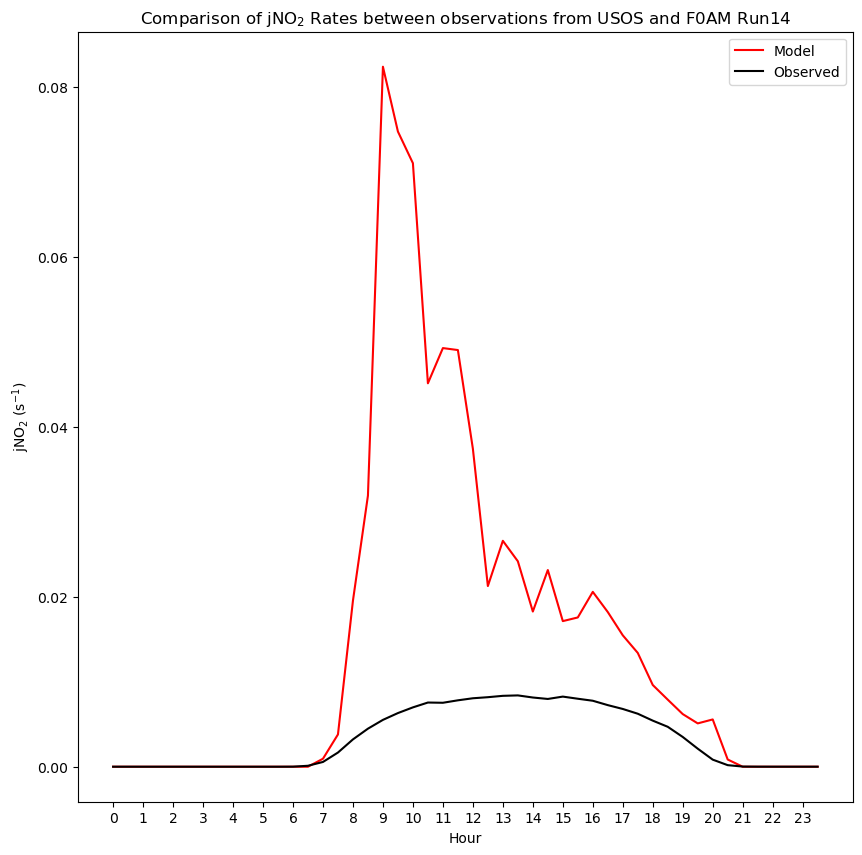

In [16]:
fig, ax = plt.subplots(figsize = (10,10))
hour_range = np.arange(0,24,0.5)
plt.plot(hour_range, model_jno2, label = 'Model', color = 'red')
plt.plot(hour_range, obs_jno2, label = 'Observed', color = 'black')
plt.xlabel('Hour')
plt.ylabel('jNO$_2$ (s$^{-1}$)')
plt.title('Comparison of jNO$_2$ Rates between observations from USOS and F0AM Run'+str(run_number))
plt.xticks(np.arange(0,24))
plt.legend()
#plt.savefig(run_path_plots + 'jno2_compare_plot.png')
plt.show()


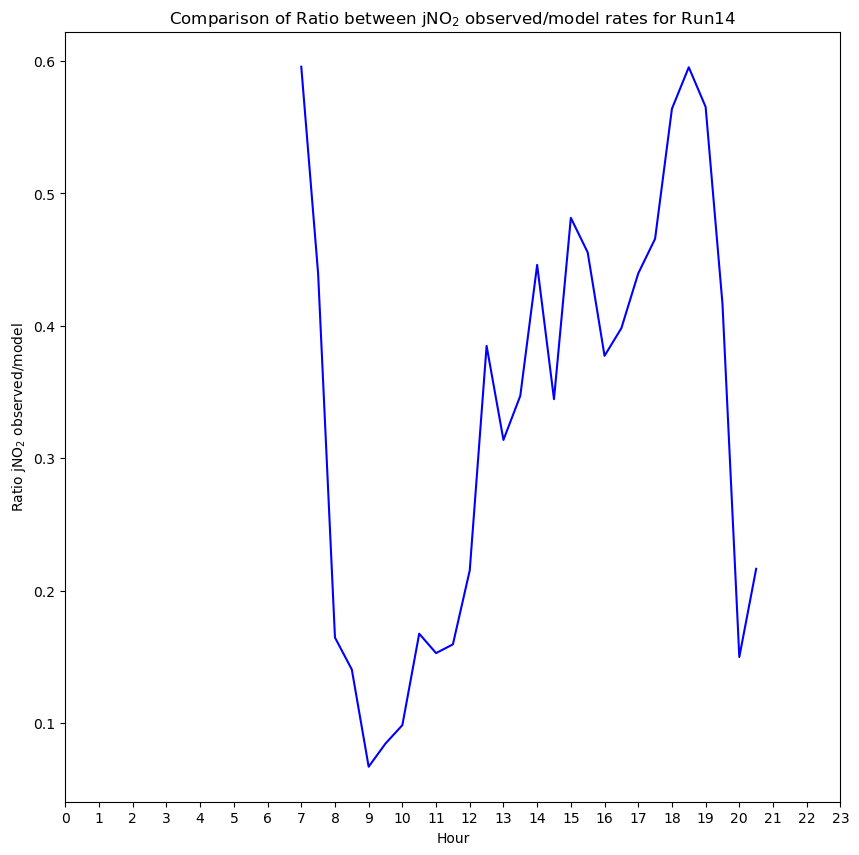

In [17]:
ratio_jno2 = obs_jno2/model_jno2

fig, ax = plt.subplots(figsize = (10,10))
hour_range = np.arange(0,24,0.5)
plt.plot(hour_range, ratio_jno2, color = 'blue')
plt.xlabel('Hour')
plt.ylabel('Ratio jNO$_2$ observed/model')
plt.title('Comparison of Ratio between jNO$_2$ observed/model rates for Run'+str(run_number))
plt.xticks(np.arange(0,24))
#plt.savefig(run_path_plots + 'jno2_ratio_plot.png')
plt.show()

In [248]:
ratio = ratio_jno2.values
ratio.mean()
print(np.ma.masked_invalid(ratio).mean())

0.7675683828505678
